#### Import Required Model

In [79]:
# Import Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Import Yellowbrick for visualization
from yellowbrick.regressor import PredictionError

# Import TensorFlow for neural network modeling
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy  # Keep this line if you need TensorFlow 1.x syntax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


#### Import dataset

In [2]:
# Import the car sales dataset
car_sales = pd.read_csv('car_sales_data.csv')

# Output the dataframe to gain domain knowledge insight of the dataset
car_sales

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630


a. Compare regression models that predict the price of a car based on a single 
numerical input feature. Based on your results, which numerical variable in the 
dataset is the best predictor for a car’s price, and why? For each numerical input 
feature, is the price better fit by a linear model or by a non-linear (e.g. polynomial) 
model?

#### Engine size single numerical input feature [ Linear Regression Model ]

In [3]:
# Extract the input feature 
# also make it a 2-dimensional array
x = car_sales[['Engine size']]

# Extract the output feature
y = car_sales['Price']

In [4]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

# Check the size of the training and testing sets
print('There are %d data points in the training set.' % (len(x_train), ))
print('There are %d data points in the testing set.' % (len(x_test), ))

There are 40000 data points in the training set.
There are 10000 data points in the testing set.


In [5]:
# Create a linear regression model
price_engine_model = LinearRegression()

# Fit the model on the training data
price_engine_model.fit(x_train, y_train)

LinearRegression()

In [6]:
# Get the coefficient from the best-fit model
gradient = price_engine_model.coef_[0]
intercept = price_engine_model.intercept_

print('gradient: ', gradient)
print('intercept: ', intercept)

gradient:  8907.10304424609
intercept:  -1939.669095633275


As the engine size increases by one unit, the predicted price increases by approximately 8907.103 units


In [7]:
# Import the metrics from the sklearn library
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the 'predict' method of the 'price_engine_model' to make predictions on the test data.
price_engine_pred = price_engine_model.predict(x_test)

In [8]:
def performance_matrixs(y_test, prediction):
    # Calculate the mean absolute error
    mean_abs = mean_absolute_error(y_test, prediction)

    # Calculate the mean squared error
    mean_squared = mean_squared_error(y_test, prediction)

    # Calculate root mean squared error
    rms_error = np.sqrt(mean_squared)

    # Calculate the R2 score
    R2 = r2_score(y_test, prediction)

    # Print the results of these metrics.
    print("Mean absolute error: ", mean_abs)
    print("Mean squared error: ", mean_squared)
    print("Root mean squared error: ", rms_error)
    print("R2: ", R2)

In [9]:
# Get the performance matrix
performance_matrixs(y_test, price_engine_pred)

Mean absolute error:  10817.491562557909
Mean squared error:  230499154.45279127
Root mean squared error:  15182.198604049128
R2:  0.15062562461380213


The mean absolute error and root mean squared error have the same physical units as the quantity that the model is predicting, so we see that the typical error or uncertainty in these predictions is 10817.4 (MAE) or 15182.1 (RMSE).

The R2 score gives an overall measure of how well the model is performing. An R2 score closer to 1 indicates that the model is doing well. In this model, we find an R2 score of 0.15, which tells usthat this model is not a good fit to the data.


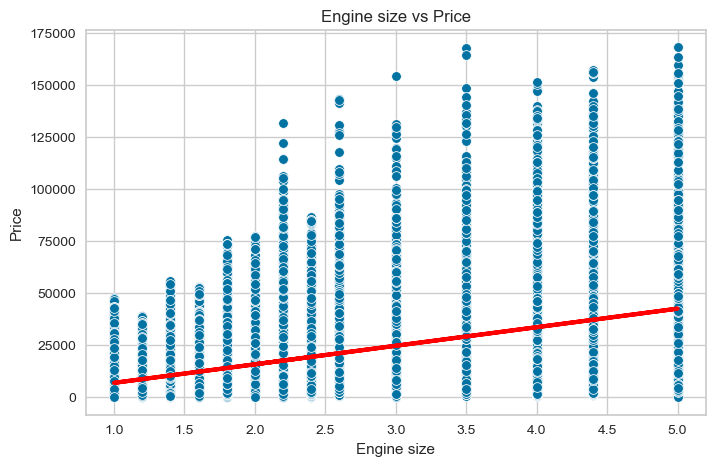

In [10]:
# Convert the 'x_test' DataFrame to NumPy array for plotting.
x_test_np = x_test.values

# Create a scatter plot for actual prices using the 'Engine size' as x-axis and 'Price' as y-axis.
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'Engine size', y = 'Price', data=car_sales)
plt.title('Engine size vs Price') # Set the title for the scatter plot.

# Plot the regression line using the predicted prices from the 'price_engine_pred' array.
plt.plot(x_test_np, price_engine_pred, color='red', linewidth=3, label='Linear Regression')

# Display the plot.
plt.show()

#### Engine size single numerical input feature [ Polynomial Regression Model ]

In [11]:
# Reshape the data to fit the model
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [12]:
# Create Polynomial features (e.g., degree=2 for quadratic)
degree = 2
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

In [13]:
# Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

LinearRegression()

In [14]:
# Make predictions on the test set
y_pred_poly = poly_model.predict(x_test_poly)

In [15]:
# Get the perfomance matrixs
performance_matrixs(y_test, y_pred_poly)

Mean absolute error:  10807.262347148484
Mean squared error:  230326165.9994689
Root mean squared error:  15176.500452985494
R2:  0.15126307580028708


In [16]:
def polynomial_regression(x, y, degree=2, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

    # Reshape the data to fit the model
    x_train = x_train.values.reshape(-1, 1)
    x_test = x_test.values.reshape(-1, 1)

    # Create Polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.transform(x_test)

    # Train the Polynomial Regression model
    poly_model = LinearRegression()
    poly_model.fit(x_train_poly, y_train)

    # Make predictions on the test set
    y_pred_poly = poly_model.predict(x_test_poly)

    # Sort the test set data for plotting
    sorted_indices = np.argsort(x_test[:, 0])
    x_test_sorted = x_test[sorted_indices]
    y_pred_poly_sorted = y_pred_poly[sorted_indices]

    return x_test_sorted, y_pred_poly_sorted

In [17]:
# Perform polynomial regression with a degree of 2 on input features 'x' and target values 'y',
# obtaining sorted test data 'x_test_sorted' and corresponding predicted values 'y_pred_poly_sorted'.
x_test_sorted, y_pred_poly_sorted = polynomial_regression(x, y, degree=2, test_size=0.2, random_state=42)

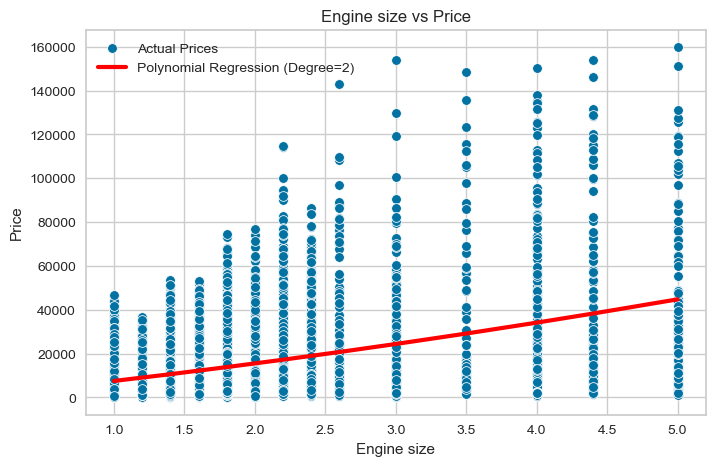

In [18]:
# Plot the results using Seaborn for the scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=x_test[:, 0], y=y_test,  label='Actual Prices')
plt.plot(x_test_sorted, y_pred_poly_sorted, color='red', linewidth=3, label=f'Polynomial Regression (Degree={degree})')
plt.title('Engine size vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Year of manufacture single numerical input feature [ Linear Regression Model ]

In [19]:
# Extract the input feature 
# also make it a 2-dimensional array
x = car_sales[['Year of manufacture']]

# Extract the output feature
y = car_sales['Price']


In [20]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

# Check the size of the training and testing sets
print('There are %d data points in the training set.' % (len(x_train), ))
print('There are %d data points in the testing set.' % (len(x_test), ))

There are 40000 data points in the training set.
There are 10000 data points in the testing set.


In [21]:
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x. This will find the mean and
# standard deviation in x, using the whole
# dataset.
scale.fit(x)

StandardScaler()

In [22]:
# Create a linear regression model
price_engine_model = LinearRegression()

# Fit the model on the training data
price_engine_model.fit(x_train, y_train)
# price_engine_model.fit(x_train_scaled, y_train)

LinearRegression()

In [23]:
# Get the coefficient from the best-fit model
gradient = price_engine_model.coef_[0]
intercept = price_engine_model.intercept_

print('gradient: ', gradient)
print('intercept: ', intercept)

gradient:  1214.5568646876193
intercept:  -2420400.6235226775


In [24]:
# Predict the outputs(prices) from the input(Engine size)
price_engine_pred = price_engine_model.predict(x_test)


In [25]:
# Get the performance matrix
performance_matrixs(y_test, price_engine_pred)

Mean absolute error:  7031.039208674777
Mean squared error:  132678999.94793108
Root mean squared error:  11518.637069893777
R2:  0.5110865244812847


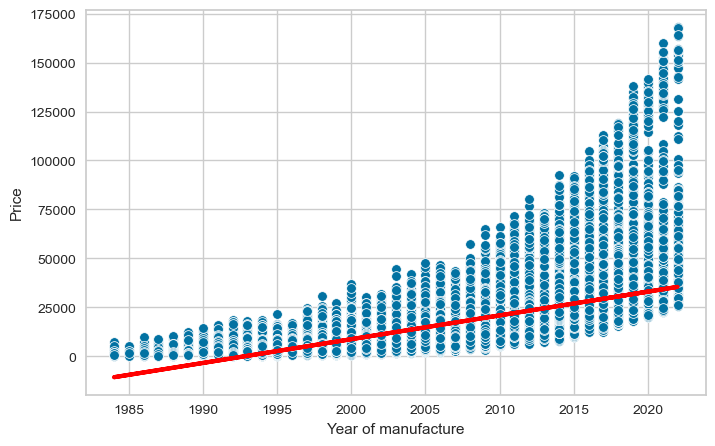

In [26]:
plt.figure(figsize=(8,5))
# Convert to NumPy arrays
x_test_np = x_test.values
 

# Scatter plot for actual prices
sns.scatterplot(x = 'Year of manufacture', y = 'Price', data=car_sales)

# Plot the regression line
plt.plot(x_test_np, price_engine_pred, color='red', linewidth=3, label='Linear Regression')
plt.show()

#### Year of manufacture single numerical input feature [ Polynomial Regression Model ]

In [27]:
# Reshape the data to fit the model
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [28]:
# Create Polynomial features (e.g., degree=2 for quadratic)
degree = 2
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

In [29]:
# Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

LinearRegression()

In [30]:
# Make predictions on the test set
y_pred_poly = poly_model.predict(x_test_poly)

In [31]:
# Get the perfomance matrixs
performance_matrixs(y_test, y_pred_poly)

Mean absolute error:  5387.109074916023
Mean squared error:  105993894.2020309
Root mean squared error:  10295.333612954506
R2:  0.6094194015751171


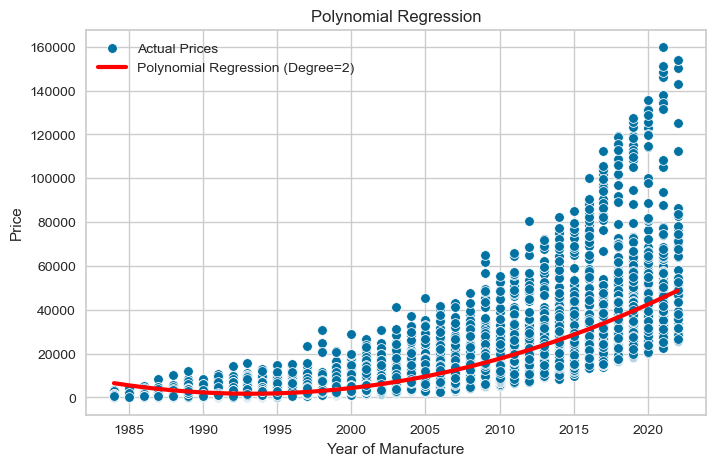

In [32]:
# Initilize polynomial regression
x_test_sorted, y_pred_poly_sorted = polynomial_regression(x, y, degree=2, test_size=0.2, random_state=42)


# Plot the results using Seaborn for the scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=x_test[:, 0], y=y_test, label='Actual Prices')
plt.plot(x_test_sorted, y_pred_poly_sorted, color='red', linewidth=3, label=f'Polynomial Regression (Degree={degree})')
plt.title('Polynomial Regression')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Mileage single numerical input feature [ Linear Regression Model ]

In [33]:
# Extract the input feature 
# also make it a 2-dimensional array
x = car_sales[['Mileage']]

# Extract the output feature
y = car_sales['Price']

In [34]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

# Check the size of the training and testing sets
print('There are %d data points in the training set.' % (len(x_train), ))
print('There are %d data points in the testing set.' % (len(x_test), ))

There are 40000 data points in the training set.
There are 10000 data points in the testing set.


In [35]:
# Create a linear regression model
price_engine_model = LinearRegression()

# Fit the model on the training data
price_engine_model.fit(x_train, y_train)

LinearRegression()

In [36]:
# Get the coefficient from the best-fit model
gradient = price_engine_model.coef_[0]
intercept = price_engine_model.intercept_

print('gradient: ', gradient)
print('intercept: ', intercept)

gradient:  -0.1449614733980298
intercept:  30121.882509750605


In [37]:
# Predict the outputs(prices) from the input(Engine size)
price_engine_pred = price_engine_model.predict(x_test)

In [38]:
# Get the performance matrix
performance_matrixs(y_test, price_engine_pred)

Mean absolute error:  7964.784670024687
Mean squared error:  162468566.87254104
Root mean squared error:  12746.315815659875
R2:  0.4013139100884707


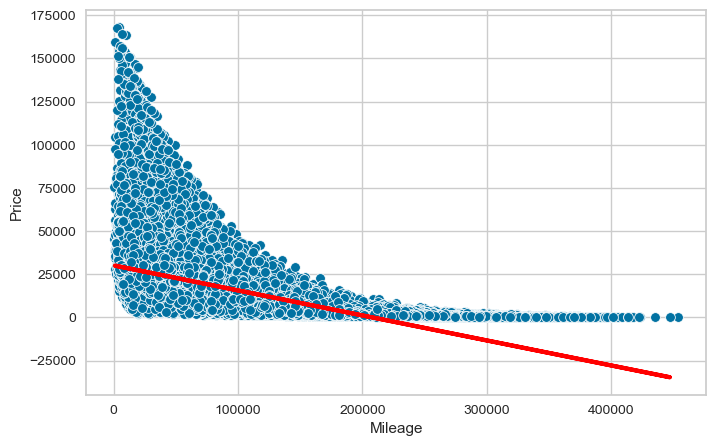

In [39]:
# Set the size of the graph
plt.figure(figsize=(8,5))

# Convert to NumPy arrays
x_test_np = x_test.values
 

# Scatter plot for actual prices
sns.scatterplot(x = 'Mileage', y = 'Price', data=car_sales)

# Plot the regression line
plt.plot(x_test_np, price_engine_pred, color='red', linewidth=3, label='Linear Regression')
plt.show()

#### Mileage single numerical input feature [ Polynomial Regression Model ]

In [40]:
# Reshape the data to fit the model
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [41]:
# Create Polynomial features (e.g., degree=2 for quadratic)
degree = 2
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

In [42]:
# Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

LinearRegression()

In [43]:
# Make predictions on the test set
y_pred_poly = poly_model.predict(x_test_poly)

In [44]:
# Get the perfomance matrixs
performance_matrixs(y_test, y_pred_poly)

Mean absolute error:  6409.911605230811
Mean squared error:  129620312.16266102
Root mean squared error:  11385.091662461968
R2:  0.5223575898059397


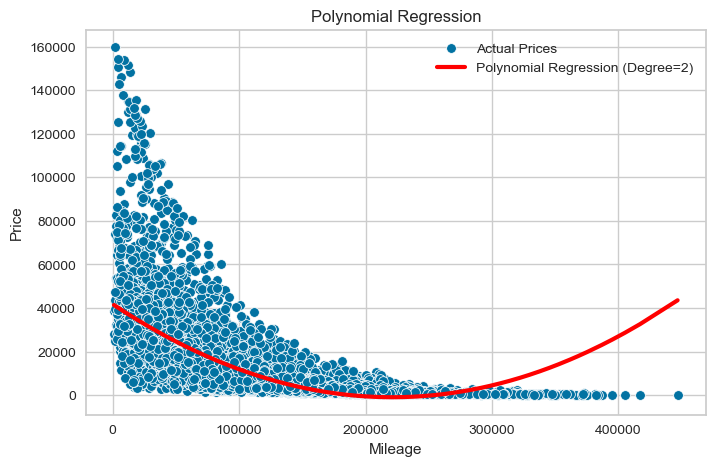

In [45]:
# Initilize polynomial regression
x_test_sorted, y_pred_poly_sorted = polynomial_regression(x, y, degree=2, test_size=0.2, random_state=42)


# Plot the results using Seaborn for the scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=x_test[:, 0], y=y_test,  label='Actual Prices')
plt.plot(x_test_sorted, y_pred_poly_sorted, color='red', linewidth=3, label=f'Polynomial Regression (Degree={degree})')
plt.title('Polynomial Regression')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
plt.show()


b. Consider regression models that take multiple numerical variables as input features 
to predict the price of a car. Does the inclusion of multiple input features improve 
the accuracy of the model’s prediction compared to the single-input feature models 
that you explored in part (a)?

In [46]:
X = car_sales[['Engine size', 'Year of manufacture', 'Mileage']]
y = car_sales['Price']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.head()

,Engine size,Year of manufacture,Mileage
39087,1.4,1990,143415
30893,1.0,1990,259900
45278,2.0,2006,106750
16398,1.8,2001,126649
13653,2.0,1992,66179


In [49]:
y_train.head()

39087     1438
30893      448
45278    14099
16398     8234
13653     6721
Name: Price, dtype: int64

In [50]:
price_model = LinearRegression()

In [51]:
# Train the data
price_model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Display the model intercept
price_model.intercept_

-1976531.8352615724

In [53]:
# Get the coefficient
coef_param = pd.DataFrame(price_model.coef_, index = X.columns, columns = ['Coefficient'] )
coef_param

,Coefficient
Engine size,8931.978776
Year of manufacture,987.317147
Mileage,-0.038014


The increase of 1 unit in price affects the Mileage negetively causes Engine size to increase by 8931

In [54]:
# Get the prediction value
price_prediction = price_model.predict(X_test)

In [55]:
# Display Prediction
price_prediction 

array([38475.21583607, 31096.42421515, 22205.87058165, ...,
       31271.35800274, -5407.42011207, 30709.52672535])

In [56]:
# Get the Actual value and Predicted value
pred_vs_actual_values = {'Actual':y_test, 'Predicted':price_prediction}
compare_pred = pd.DataFrame(pred_vs_actual_values).reset_index(drop=True)
compare_pred.head()

,Actual,Predicted
0,68597,38475.215836
1,35276,31096.424215
2,17370,22205.870582
3,3213,5718.327307
4,4832,5798.093955


In [57]:
def evaluation_matrics(y_test, prediction):
    # Calculate the mean absolute error
    mean_abs = mean_absolute_error(y_test, prediction)

    # Calculate the mean squared error
    mean_squared = mean_squared_error(y_test, prediction)

    # Calculate root mean squared error
    rms_error = np.sqrt(mean_squared)

    # Calculate the R2 score
    R2 = r2_score(y_test, prediction)

    # Print the results of these metrics.
    print("Mean absolute error: ", mean_abs)
    print("Mean squared error: ", mean_squared)
    print("Root mean squared error: ", rms_error)
    print("R2_score: ", R2)

evaluation_matrics(y_test, price_prediction)

Mean absolute error:  6091.458141656882
Mean squared error:  89158615.76017112
Root mean squared error:  9442.384008298493
R2_score:  0.6714563064173691


* R2 score is the ability of the depedant variables to explain the independant variables
* Clearly an R2 of 0.67 shows a better outcome the multi regression than the single feature regression

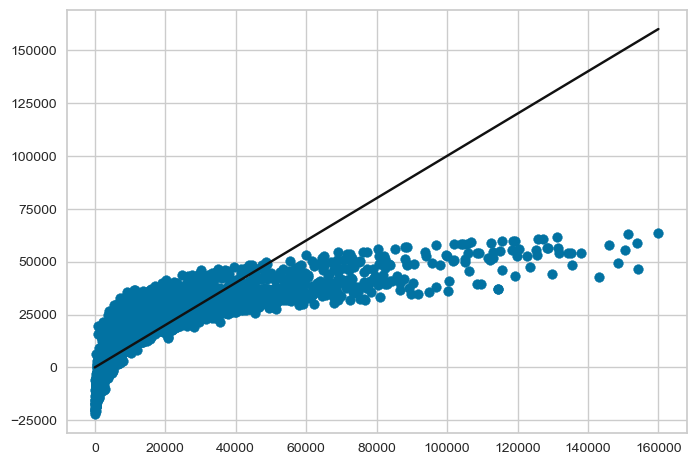

In [58]:
# Create a scatter plot for price prediction
plt.scatter(y_test, price_prediction)
plt.plot([0, 160000], [0,160000], 'k-')

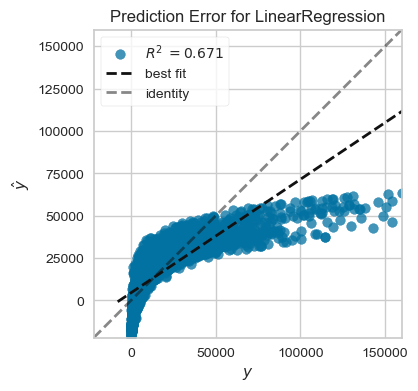

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [59]:
# Create the prediction visualiser

visualiser = PredictionError(price_model, size=(600, 400))

visualiser.fit(X_train, y_train)
visualiser.score(X_test, y_test)


visualiser.show()

c. In parts (a) and (b) you only considered models that use the numerical variables from 
the dataset as inputs. However, there are also several categorical variables in the 
dataset that are likely to affect the price of the car. Now train a regression model 
that uses all relevant input variables (both categorical and numerical) to predict the 
price (e.g. a Random Forest Regressor model). Does this improve the accuracy of 
your results?

In [60]:
# Initialise the LabelEncoder
label_encoder = LabelEncoder()

In [61]:
# Covert categorical labels to numerical values using the LabelEncoder
car_sales['Manufacturer'] = label_encoder.fit_transform(car_sales['Manufacturer'])
car_sales['Model'] = label_encoder.fit_transform(car_sales['Model'])
car_sales['Fuel type'] = label_encoder.fit_transform(car_sales['Fuel type'])

In [62]:
# Split the data in features (X) and target variable (y)
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Initialize the Random Forest Regression Model and set the number of decision trees to 100
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [65]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [66]:
# Make prediction
y_pred = rf_model.predict(X_test)

In [67]:
evaluation_matrics(y_test, y_pred)

Mean absolute error:  332.434078
Mean squared error:  475750.15697454003
Root mean squared error:  689.7464439738272
R2_score:  0.9982468916496485


- The R2 score of 0.9982 explains that the model explains 99.82% of the variance of the target variable. This score suggests that the model is fitting the data very well
- The low MAE, MSE and RMSE implies that the model's predictions are close to the actual values
- The Matrics indicates that the model is a good fit to the data

In [68]:
# Create a DataFrame for actual and predicted price
result_pred = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

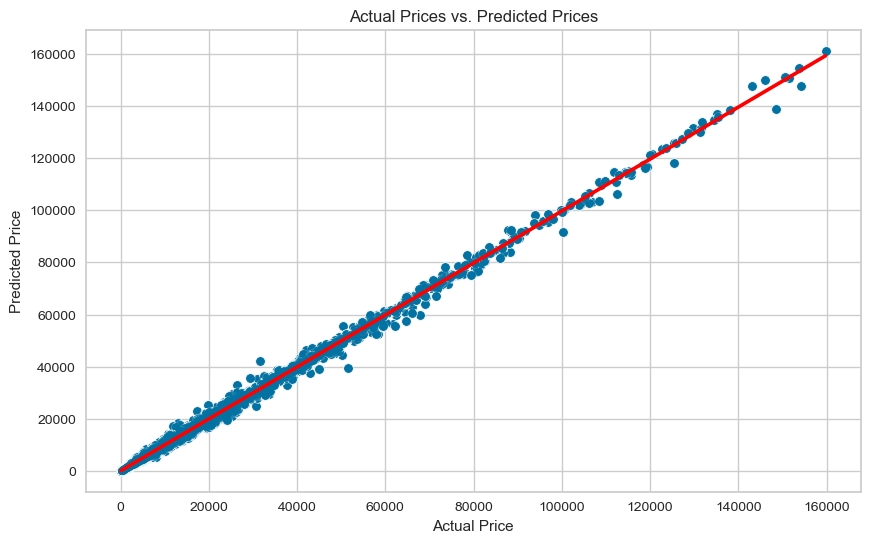

In [69]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=result_pred)
sns.regplot(x='Actual Price', y='Predicted Price', data=result_pred, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [70]:
# Get the contribution of each feature to the model's prediction
feature_importances = rf_model.feature_importances_
feature_importances

array([0.00572593, 0.05773012, 0.26471484, 0.01196999, 0.61830973,
       0.04154939])

In [71]:
# Create a DataFrame for feature importances
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [72]:
# Sort the DataFrame by importance in descending order
feature_df = feature_df.sort_values(by='Importance', ascending=False)

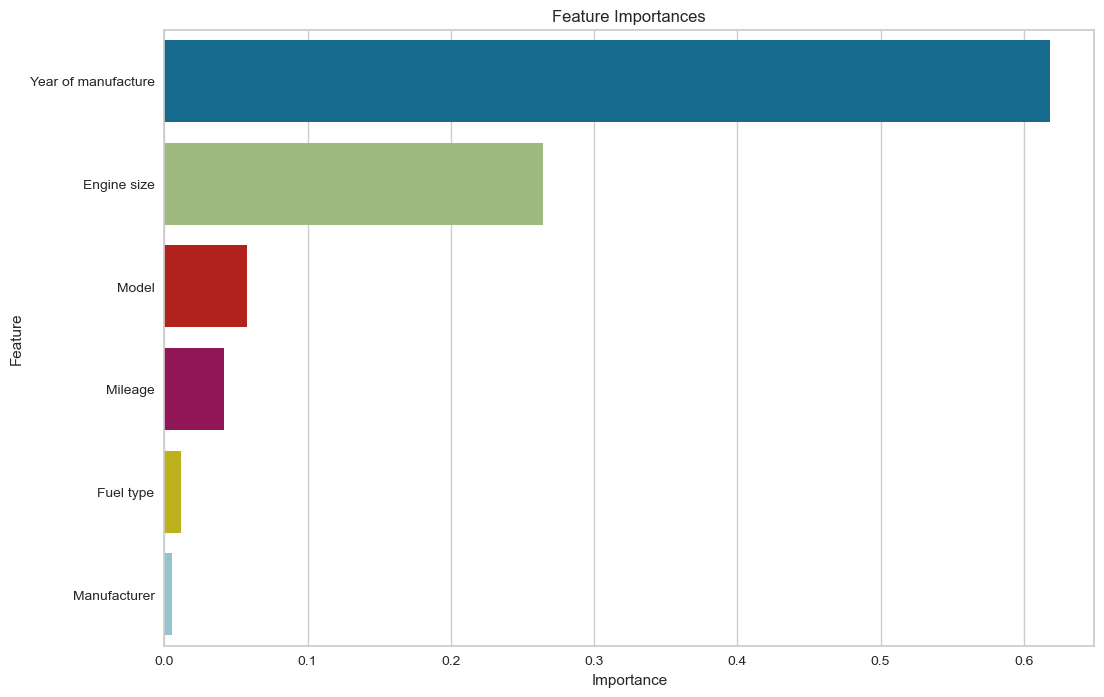

In [73]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importances')
plt.show()

The Year of manufacture contributes more the the price prediction followed by engine size and car model


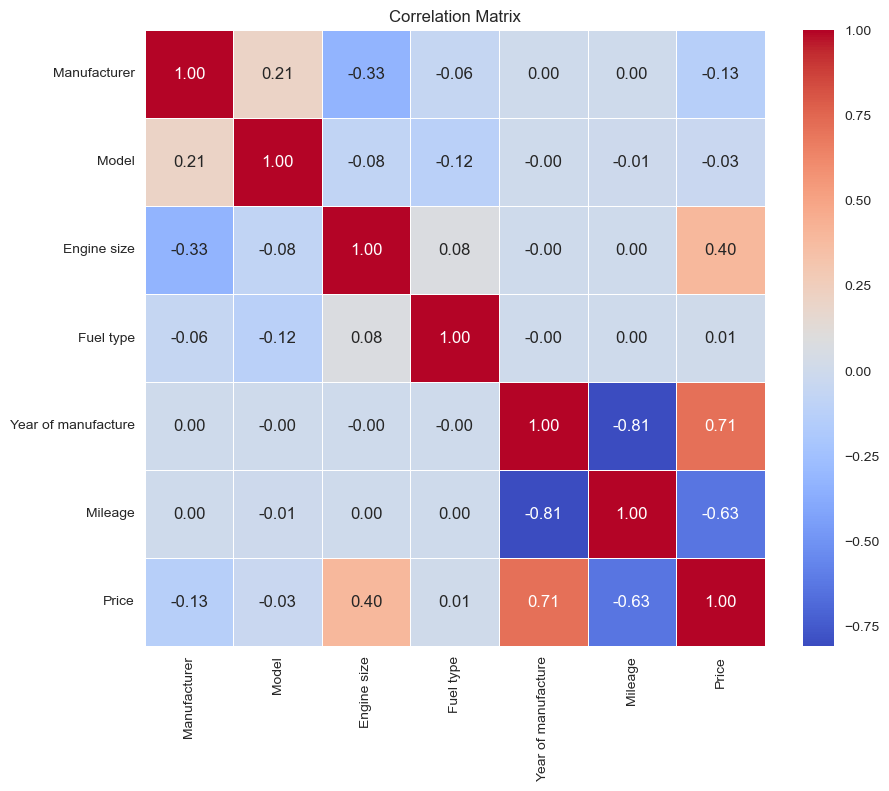

In [74]:
# Get the correlation matrix
correlation_matrix = car_sales.corr()

# Display the graph
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

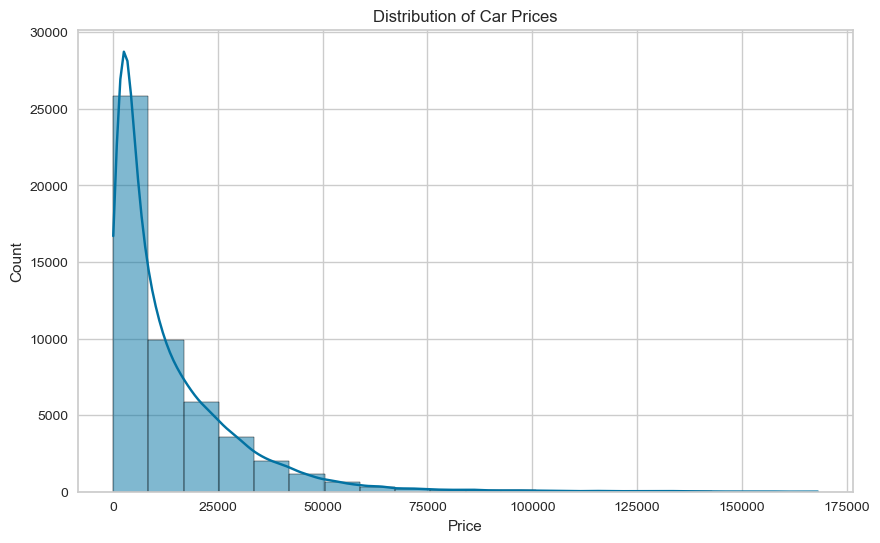

In [75]:
# Display the car prices distribution
plt.figure(figsize=(10, 6))
sns.histplot(car_sales['Price'], bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.show()


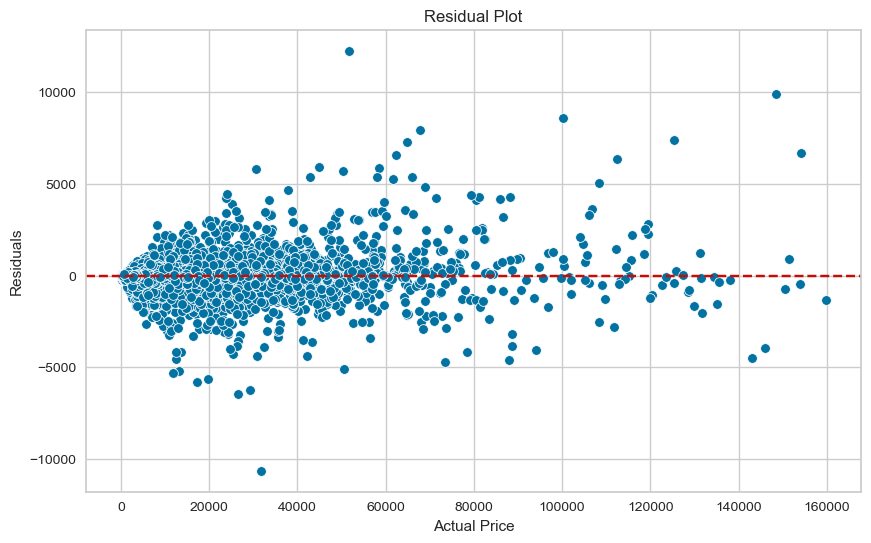

In [76]:
# Get the residual data
residuals = y_test - y_pred

# Display the residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

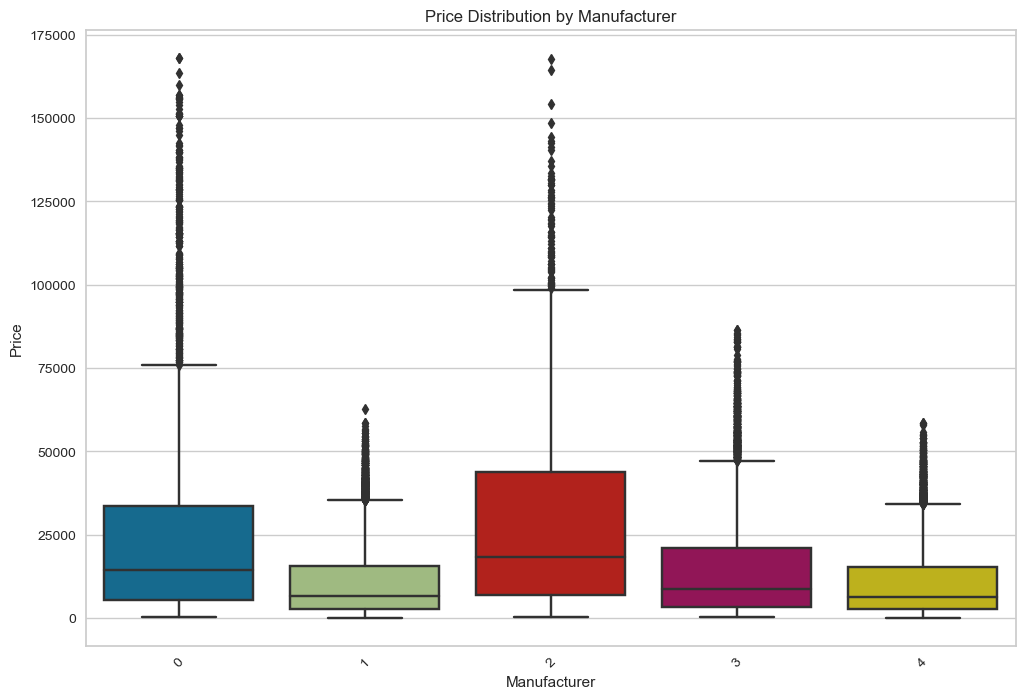

In [77]:
# Display the plot distribution by manuefacturer
plt.figure(figsize=(12, 8))
sns.boxplot(x='Manufacturer', y='Price', data=car_sales)
plt.title('Price Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

d. Develop an Artificial Neural Network (ANN) model to predict the price of a car based 
on all the available information from the dataset. How does its performance 
compare to the other supervised learning models that you have considered? Discuss 
your choices for the architecture of the neural network that you used, and describe 
how you tuned the hyperparameters in your model to achieve the best performance.

In [78]:
# Initialise the LabelEncoder
label_encoder = LabelEncoder()

# Covert categorical labels to numerical values using the LabelEncoder
car_sales['Manufacturer'] = label_encoder.fit_transform(car_sales['Manufacturer'])
car_sales['Model'] = label_encoder.fit_transform(car_sales['Model'])
car_sales['Fuel type'] = label_encoder.fit_transform(car_sales['Fuel type'])

# Split the data in features (X) and target variable (y)
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the MinMaxScaler class
scale = MinMaxScaler()
# the minimum and maximum in all the data.
scale.fit(X)

# Applying min-max scaler transformation to the training and testing 
# datasets ensure consistent rescaling for both sets
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

Try smaller learning rate of 0.01

In [80]:
# Create an instance of the Adam class. We
# will set the learning_rate to 0.01 here.


# Intilize the Adam optimizer
adam_optimizer = Adam(learning_rate = 0.01)
# Create an instance of the Sequential class.

# This will be our model.
model = Sequential()

# Add the first hidden layer, with
# input_dim = 6, 64 units, and the
# ReLU activation function.
model.add(Dense(units = 64, input_dim = 6, activation = "relu"))

# Add a dropout layer with a 20% dropout rate.
model.add(Dropout(0.2))

# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))

# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))

# The output layer, this will have 1 unit
# because we are predicting one value
model.add(Dense(units = 1, activation = "linear"))

# Print a summary of the model
model.summary()

# Compile the model, but we now use
# the adam_optimizer that we created
# above.
model.compile(optimizer = adam_optimizer, loss = 'mean_squared_error', metrics = 'mean_squared_error')

# Define the early stopping criterion, with
# a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Train the model
history = model.fit(x = X_train_scaled, y = y_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8833 (34.50 KB)
Trainable params: 8833 (34.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200


1125/11

Epoch 34/200
1125/1125 [==============================] - 5s 4ms/step - loss: 9899148.0000 - mean_squared_error: 9899148.0000 - val_loss: 15889775.0000 - val_mean_squared_error: 15889775.0000
Epoch 35/200
1125/1125 [==============================] - 5s 4ms/step - loss: 9374948.0000 - mean_squared_error: 9374948.0000 - val_loss: 12451977.0000 - val_mean_squared_error: 12451977.0000
Epoch 36/200
1125/1125 [==============================] - 5s 4ms/step - loss: 9301258.0000 - mean_squared_error: 9301258.0000 - val_loss: 13308290.0000 - val_mean_squared_error: 13308290.0000
Epoch 37/200
1125/1125 [==============================] - 5s 4ms/step - loss: 9675499.0000 - mean_squared_error: 9675499.0000 - val_loss: 14504670.0000 - val_mean_squared_error: 14504670.0000
Epoch 38/200
1125/1125 [==============================] - 5s 4ms/step - loss: 9407065.0000 - mean_squared_error: 9407065.0000 - val_loss: 10184818.0000 - val_mean_squared_error: 10184818.0000
Epoch 39/200
1125/1125 [================

Epoch 77/200
1125/1125 [==============================] - 5s 4ms/step - loss: 5721426.5000 - mean_squared_error: 5721426.5000 - val_loss: 7842405.5000 - val_mean_squared_error: 7842405.5000
Epoch 78/200
1125/1125 [==============================] - 5s 4ms/step - loss: 5541896.5000 - mean_squared_error: 5541896.5000 - val_loss: 14236592.0000 - val_mean_squared_error: 14236592.0000
Epoch 79/200
1125/1125 [==============================] - 5s 4ms/step - loss: 5397986.5000 - mean_squared_error: 5397986.5000 - val_loss: 13497480.0000 - val_mean_squared_error: 13497480.0000
Epoch 80/200
1125/1125 [==============================] - 5s 4ms/step - loss: 5371456.0000 - mean_squared_error: 5371456.0000 - val_loss: 19411504.0000 - val_mean_squared_error: 19411504.0000
Epoch 81/200
1125/1125 [==============================] - 5s 4ms/step - loss: 5104493.0000 - mean_squared_error: 5104493.0000 - val_loss: 9913282.0000 - val_mean_squared_error: 9913282.0000
Epoch 82/200
1125/1125 [====================

In [81]:
# Predict the model outputs for the
y_pred = model.predict(X_test_scaled)


313/313 [==============================] - 5s 2ms/step


<Figure size 1200x800 with 0 Axes>

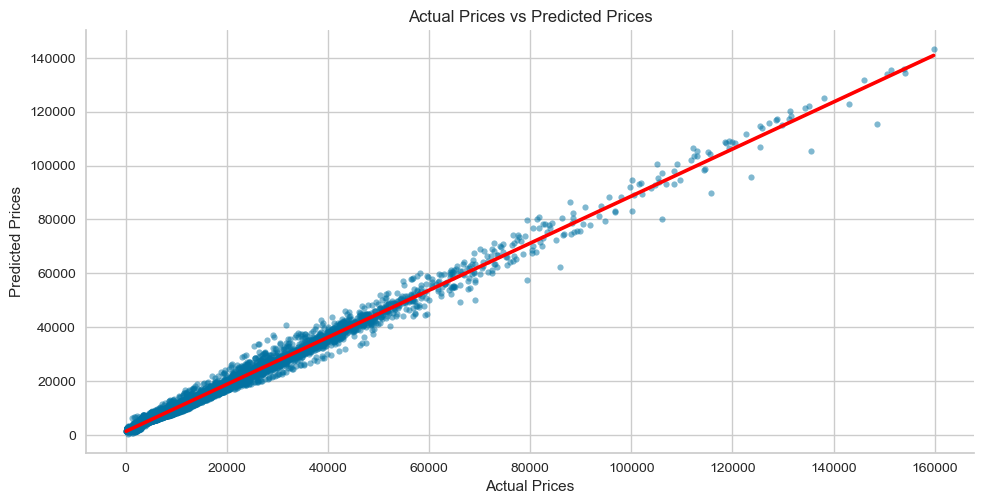

In [82]:
# Create a DataFrame for easy plotting
price_prediction = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred.flatten()})


# Set the figsize
plt.figure(figsize=(12, 8))

# Create a scatter plot with a regression line
sns.lmplot(x='Actual Prices', y='Predicted Prices', data=price_prediction , scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'}, aspect=2)
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [83]:
# We start by creating a pandas dataframe containing
# the history of the fitting.
history_df = pd.DataFrame(history.history)

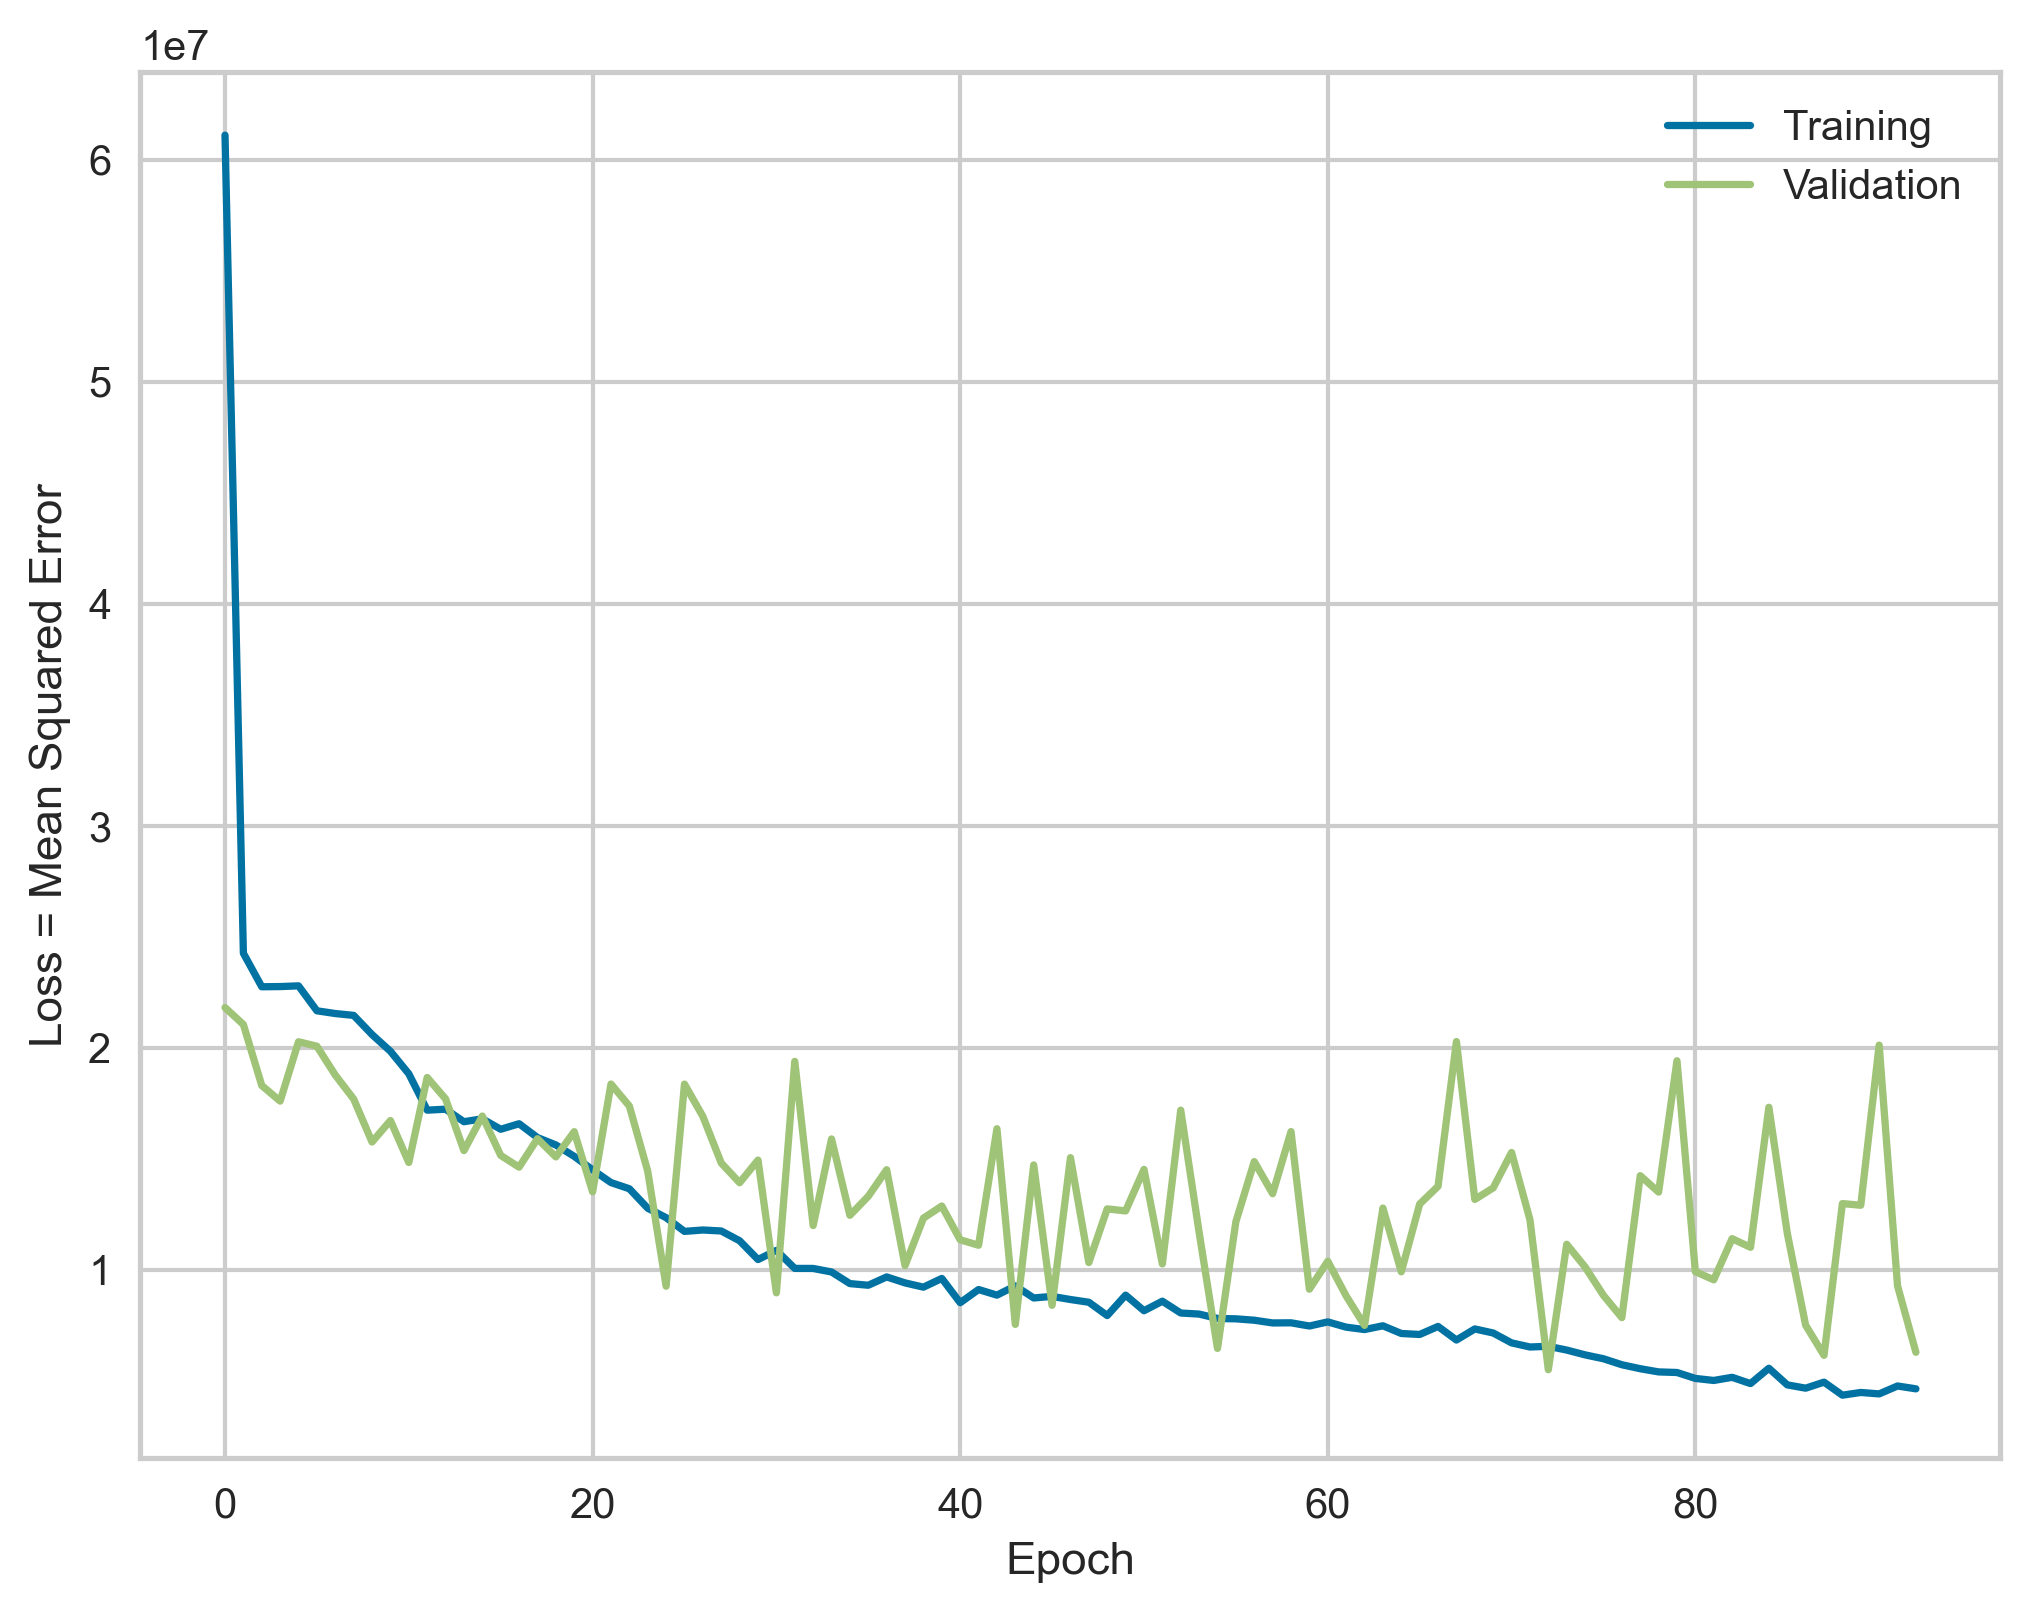

In [84]:
# Next, use matplotlib to create a figure.
plt.figure(figsize = (8, 6), dpi = 300)
# Plot the history of the training and
# validation losses.
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
# Show the plot.
plt.show()

In [86]:
# Evaluation Matrics
evaluation_matrics(y_test, y_pred)

Mean absolute error:  1636.2929744628907
Mean squared error:  6426033.696459734
Root mean squared error:  2534.962267265478
R2_score:  0.976320484254709


Try smaller learning rate of 0.0001

In [87]:
# Create an instance of the Adam class. We
# will set the learning_rate to 0.0001 here.


# Intilize the Adam optimizer
adam_optimizer = Adam(learning_rate = 0.0001)
# Create an instance of the Sequential class.

# This will be our model.
model = Sequential()

# Add the first hidden layer, with
# input_dim = 6, 64 units, and the
# ReLU activation function.
model.add(Dense(units = 64, input_dim = 6, activation = "relu"))

# Add a dropout layer with a 20% dropout rate.
model.add(Dropout(0.2))

# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))

# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))

# The output layer, this will have 1 unit
# because we are predicting one value
model.add(Dense(units = 1, activation = "linear"))

# Print a summary of the model
model.summary()

# Compile the model, but we now use
# the adam_optimizer that we created
# above.
model.compile(optimizer = adam_optimizer, loss = 'mean_squared_error', metrics = 'mean_squared_error')

# Define the early stopping criterion, with
# a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Train the model
history = model.fit(x = X_train_scaled, y = y_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                448       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8833 (34.50 KB)
Trainable params: 8833 (34.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1125/112

1125/1125 [==============================] - 5s 4ms/step - loss: 21233088.0000 - mean_squared_error: 21233088.0000 - val_loss: 18069768.0000 - val_mean_squared_error: 18069768.0000
Epoch 80/200
1125/1125 [==============================] - 5s 4ms/step - loss: 21076040.0000 - mean_squared_error: 21076040.0000 - val_loss: 18025550.0000 - val_mean_squared_error: 18025550.0000
Epoch 81/200
1125/1125 [==============================] - 5s 4ms/step - loss: 21257576.0000 - mean_squared_error: 21257576.0000 - val_loss: 17991680.0000 - val_mean_squared_error: 17991680.0000
Epoch 82/200
1125/1125 [==============================] - 5s 4ms/step - loss: 21231882.0000 - mean_squared_error: 21231882.0000 - val_loss: 17940300.0000 - val_mean_squared_error: 17940300.0000
Epoch 83/200
1125/1125 [==============================] - 5s 4ms/step - loss: 21068580.0000 - mean_squared_error: 21068580.0000 - val_loss: 18009066.0000 - val_mean_squared_error: 18009066.0000
Epoch 84/200
1125/1125 [===================

1125/1125 [==============================] - 5s 4ms/step - loss: 18894042.0000 - mean_squared_error: 18894042.0000 - val_loss: 15348887.0000 - val_mean_squared_error: 15348887.0000
Epoch 164/200
1125/1125 [==============================] - 5s 4ms/step - loss: 18898480.0000 - mean_squared_error: 18898480.0000 - val_loss: 15378268.0000 - val_mean_squared_error: 15378268.0000
Epoch 165/200
1125/1125 [==============================] - 5s 4ms/step - loss: 18779966.0000 - mean_squared_error: 18779966.0000 - val_loss: 15362319.0000 - val_mean_squared_error: 15362319.0000
Epoch 166/200
1125/1125 [==============================] - 5s 5ms/step - loss: 19165414.0000 - mean_squared_error: 19165414.0000 - val_loss: 15333504.0000 - val_mean_squared_error: 15333504.0000
Epoch 167/200
1125/1125 [==============================] - 5s 4ms/step - loss: 18575246.0000 - mean_squared_error: 18575246.0000 - val_loss: 15287262.0000 - val_mean_squared_error: 15287262.0000
Epoch 168/200
1125/1125 [==============

313/313 [==============================] - 5s 2ms/step


<Figure size 1200x800 with 0 Axes>

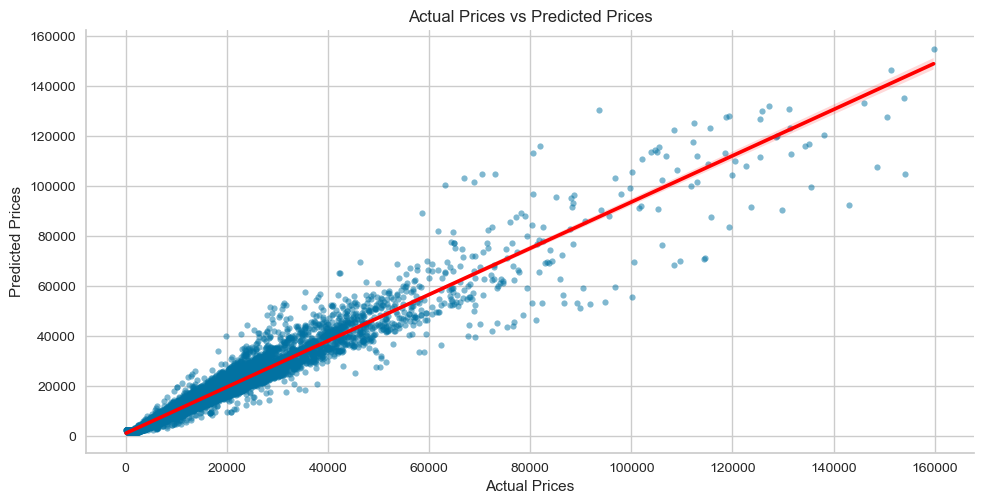

In [88]:
# Predict the model outputs for the
# tresting set.
y_pred = model.predict(X_test_scaled)
# Now use matplotlib to plot the predicted vs actual

# Create a DataFrame for easy plotting
price_prediction = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred.flatten()})


# Set the figsize
plt.figure(figsize=(12, 8))

# Create a scatter plot with a regression line
sns.lmplot(x='Actual Prices', y='Predicted Prices', data=price_prediction , scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'}, aspect=2)
plt.title('Actual Prices vs Predicted Prices')
plt.show()

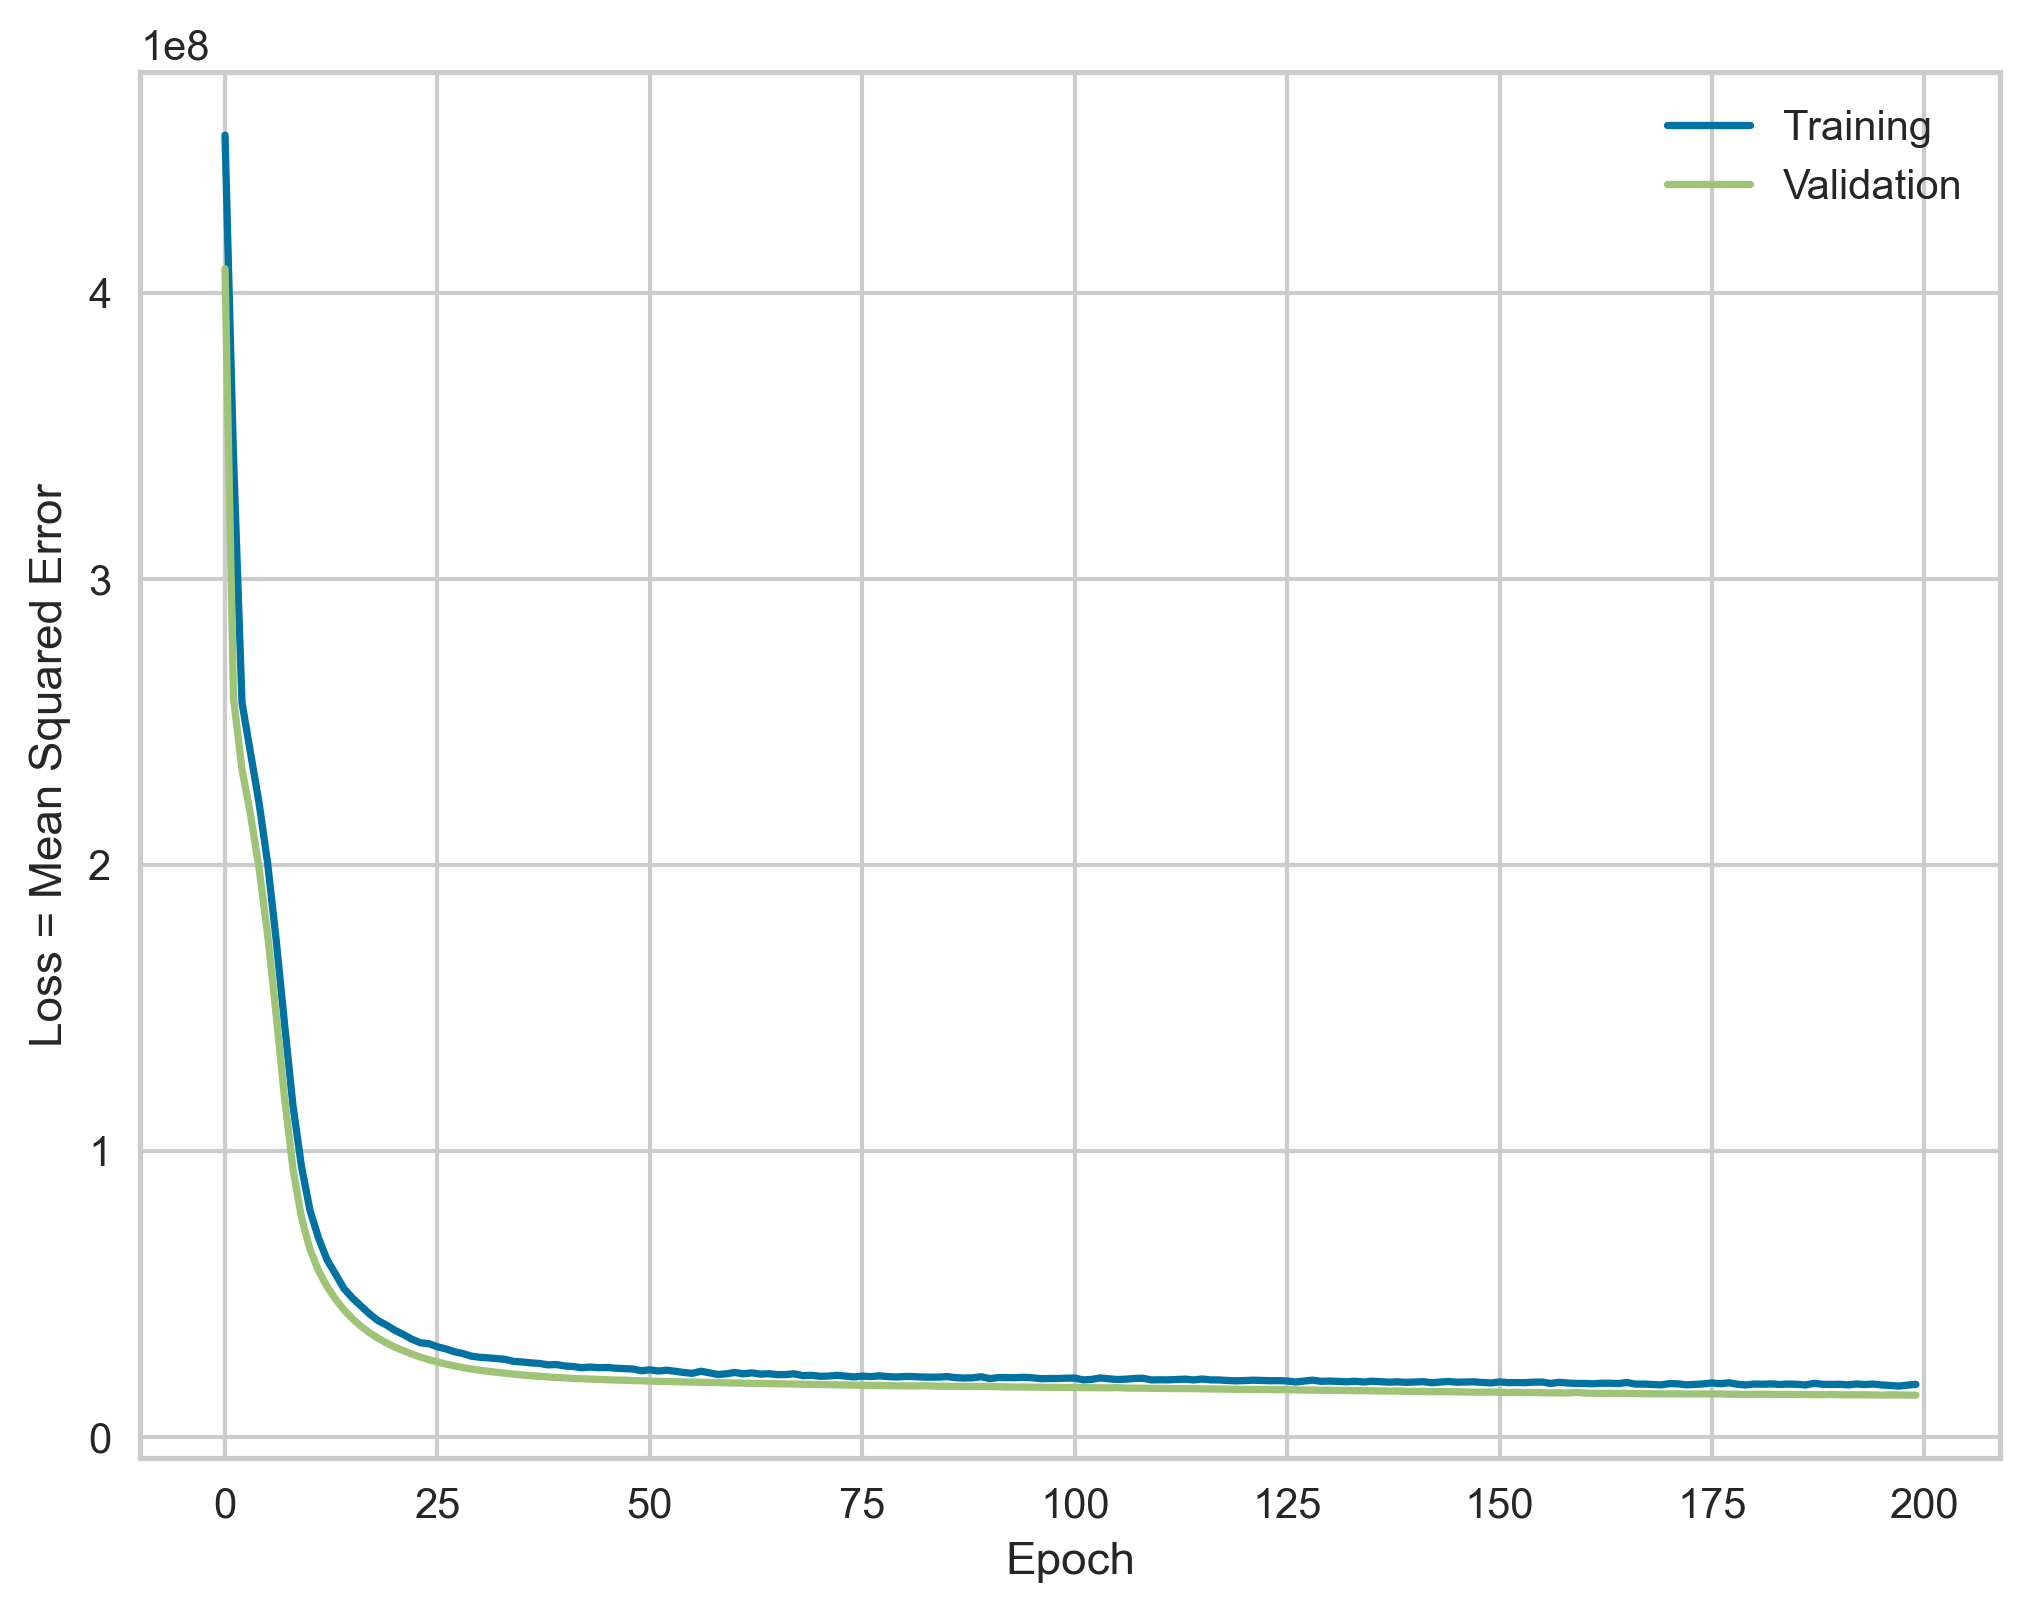

In [89]:
# We start by creating a pandas dataframe containing
# the history of the fitting.
history_df = pd.DataFrame(history.history)

# Next, use matplotlib to create a figure.
plt.figure(figsize = (8, 6), dpi = 300)
# Plot the history of the training and
# validation losses.
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
# Show the plot.
plt.show()

In [90]:
# Evaluation Matrics
evaluation_matrics(y_test, y_pred)

Mean absolute error:  1987.171644445801
Mean squared error:  15566527.132141117
Root mean squared error:  3945.443844758295
R2_score:  0.9426383611203111


In [91]:
# Create an instance of the Adam class. We
# will set the learning_rate to 0.0001 here.


# Intilize the Adam optimizer
adam_optimizer = Adam(learning_rate = 0.0001)
# Create an instance of the Sequential class.

# This will be our model.
model = Sequential()

# Add the first hidden layer, with
# input_dim = 6, 64 units, and the
# ReLU activation function.
model.add(Dense(units = 64, input_dim = 6, activation = "relu"))

# Add a dropout layer with a 10% dropout rate.
model.add(Dropout(0.1))

# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))

# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))

# The output layer, this will have 1 unit
# because we are predicting one value
model.add(Dense(units = 1, activation = "linear"))

# Print a summary of the model
model.summary()

# Compile the model, but we now use
# the adam_optimizer that we created
# above.
model.compile(optimizer = adam_optimizer, loss = 'mean_squared_error', metrics = 'mean_squared_error')

# Define the early stopping criterion, with
# a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Train the model
history = model.fit(x = X_train_scaled, y = y_train, batch_size = None, epochs= 200,
verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                448       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8833 (34.50 KB)
Trainable params: 8833 (34.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1125/112

1125/1125 [==============================] - 4s 4ms/step - loss: 20590724.0000 - mean_squared_error: 20590724.0000 - val_loss: 18334358.0000 - val_mean_squared_error: 18334358.0000
Epoch 80/200
1125/1125 [==============================] - 5s 4ms/step - loss: 20255302.0000 - mean_squared_error: 20255302.0000 - val_loss: 18278322.0000 - val_mean_squared_error: 18278322.0000
Epoch 81/200
1125/1125 [==============================] - 5s 4ms/step - loss: 20325884.0000 - mean_squared_error: 20325884.0000 - val_loss: 18210444.0000 - val_mean_squared_error: 18210444.0000
Epoch 82/200
1125/1125 [==============================] - 5s 4ms/step - loss: 20276720.0000 - mean_squared_error: 20276720.0000 - val_loss: 18132802.0000 - val_mean_squared_error: 18132802.0000
Epoch 83/200
1125/1125 [==============================] - 5s 4ms/step - loss: 20130836.0000 - mean_squared_error: 20130836.0000 - val_loss: 18077002.0000 - val_mean_squared_error: 18077002.0000
Epoch 84/200
1125/1125 [===================

1125/1125 [==============================] - 5s 4ms/step - loss: 15785931.0000 - mean_squared_error: 15785931.0000 - val_loss: 13666442.0000 - val_mean_squared_error: 13666442.0000
Epoch 164/200
1125/1125 [==============================] - 5s 4ms/step - loss: 15996244.0000 - mean_squared_error: 15996244.0000 - val_loss: 13646792.0000 - val_mean_squared_error: 13646792.0000
Epoch 165/200
1125/1125 [==============================] - 5s 4ms/step - loss: 15682139.0000 - mean_squared_error: 15682139.0000 - val_loss: 13628026.0000 - val_mean_squared_error: 13628026.0000
Epoch 166/200
1125/1125 [==============================] - 5s 4ms/step - loss: 15761836.0000 - mean_squared_error: 15761836.0000 - val_loss: 13552817.0000 - val_mean_squared_error: 13552817.0000
Epoch 167/200
1125/1125 [==============================] - 5s 4ms/step - loss: 15923389.0000 - mean_squared_error: 15923389.0000 - val_loss: 13517903.0000 - val_mean_squared_error: 13517903.0000
Epoch 168/200
1125/1125 [==============

313/313 [==============================] - 6s 3ms/step


<Figure size 1200x800 with 0 Axes>

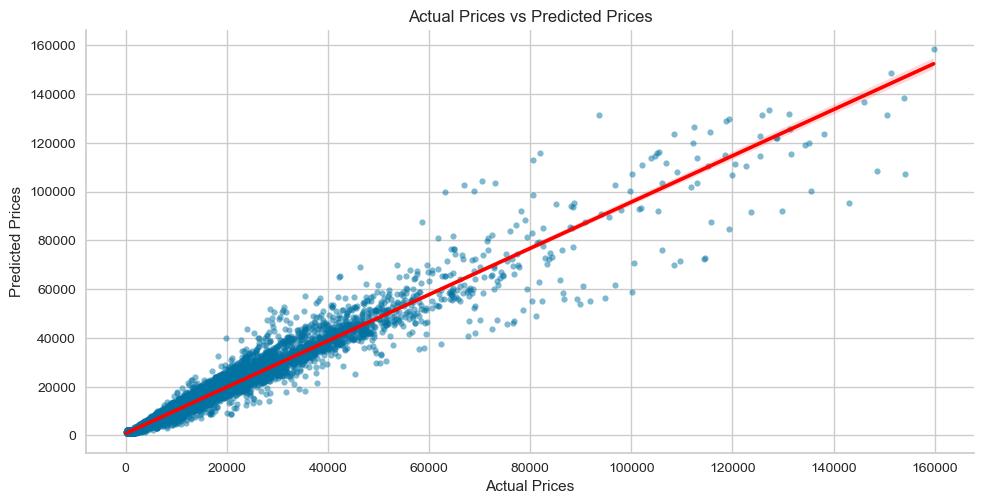

In [92]:
# Predict the model outputs for the
# tresting set.
y_pred = model.predict(X_test_scaled)
# Now use matplotlib to plot the predicted vs actual

# Create a DataFrame for easy plotting
price_prediction = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred.flatten()})


# Set the figsize
plt.figure(figsize=(12, 8))

# Create a scatter plot with a regression line
sns.lmplot(x='Actual Prices', y='Predicted Prices', data=price_prediction , scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'}, aspect=2)
plt.title('Actual Prices vs Predicted Prices')
plt.show()

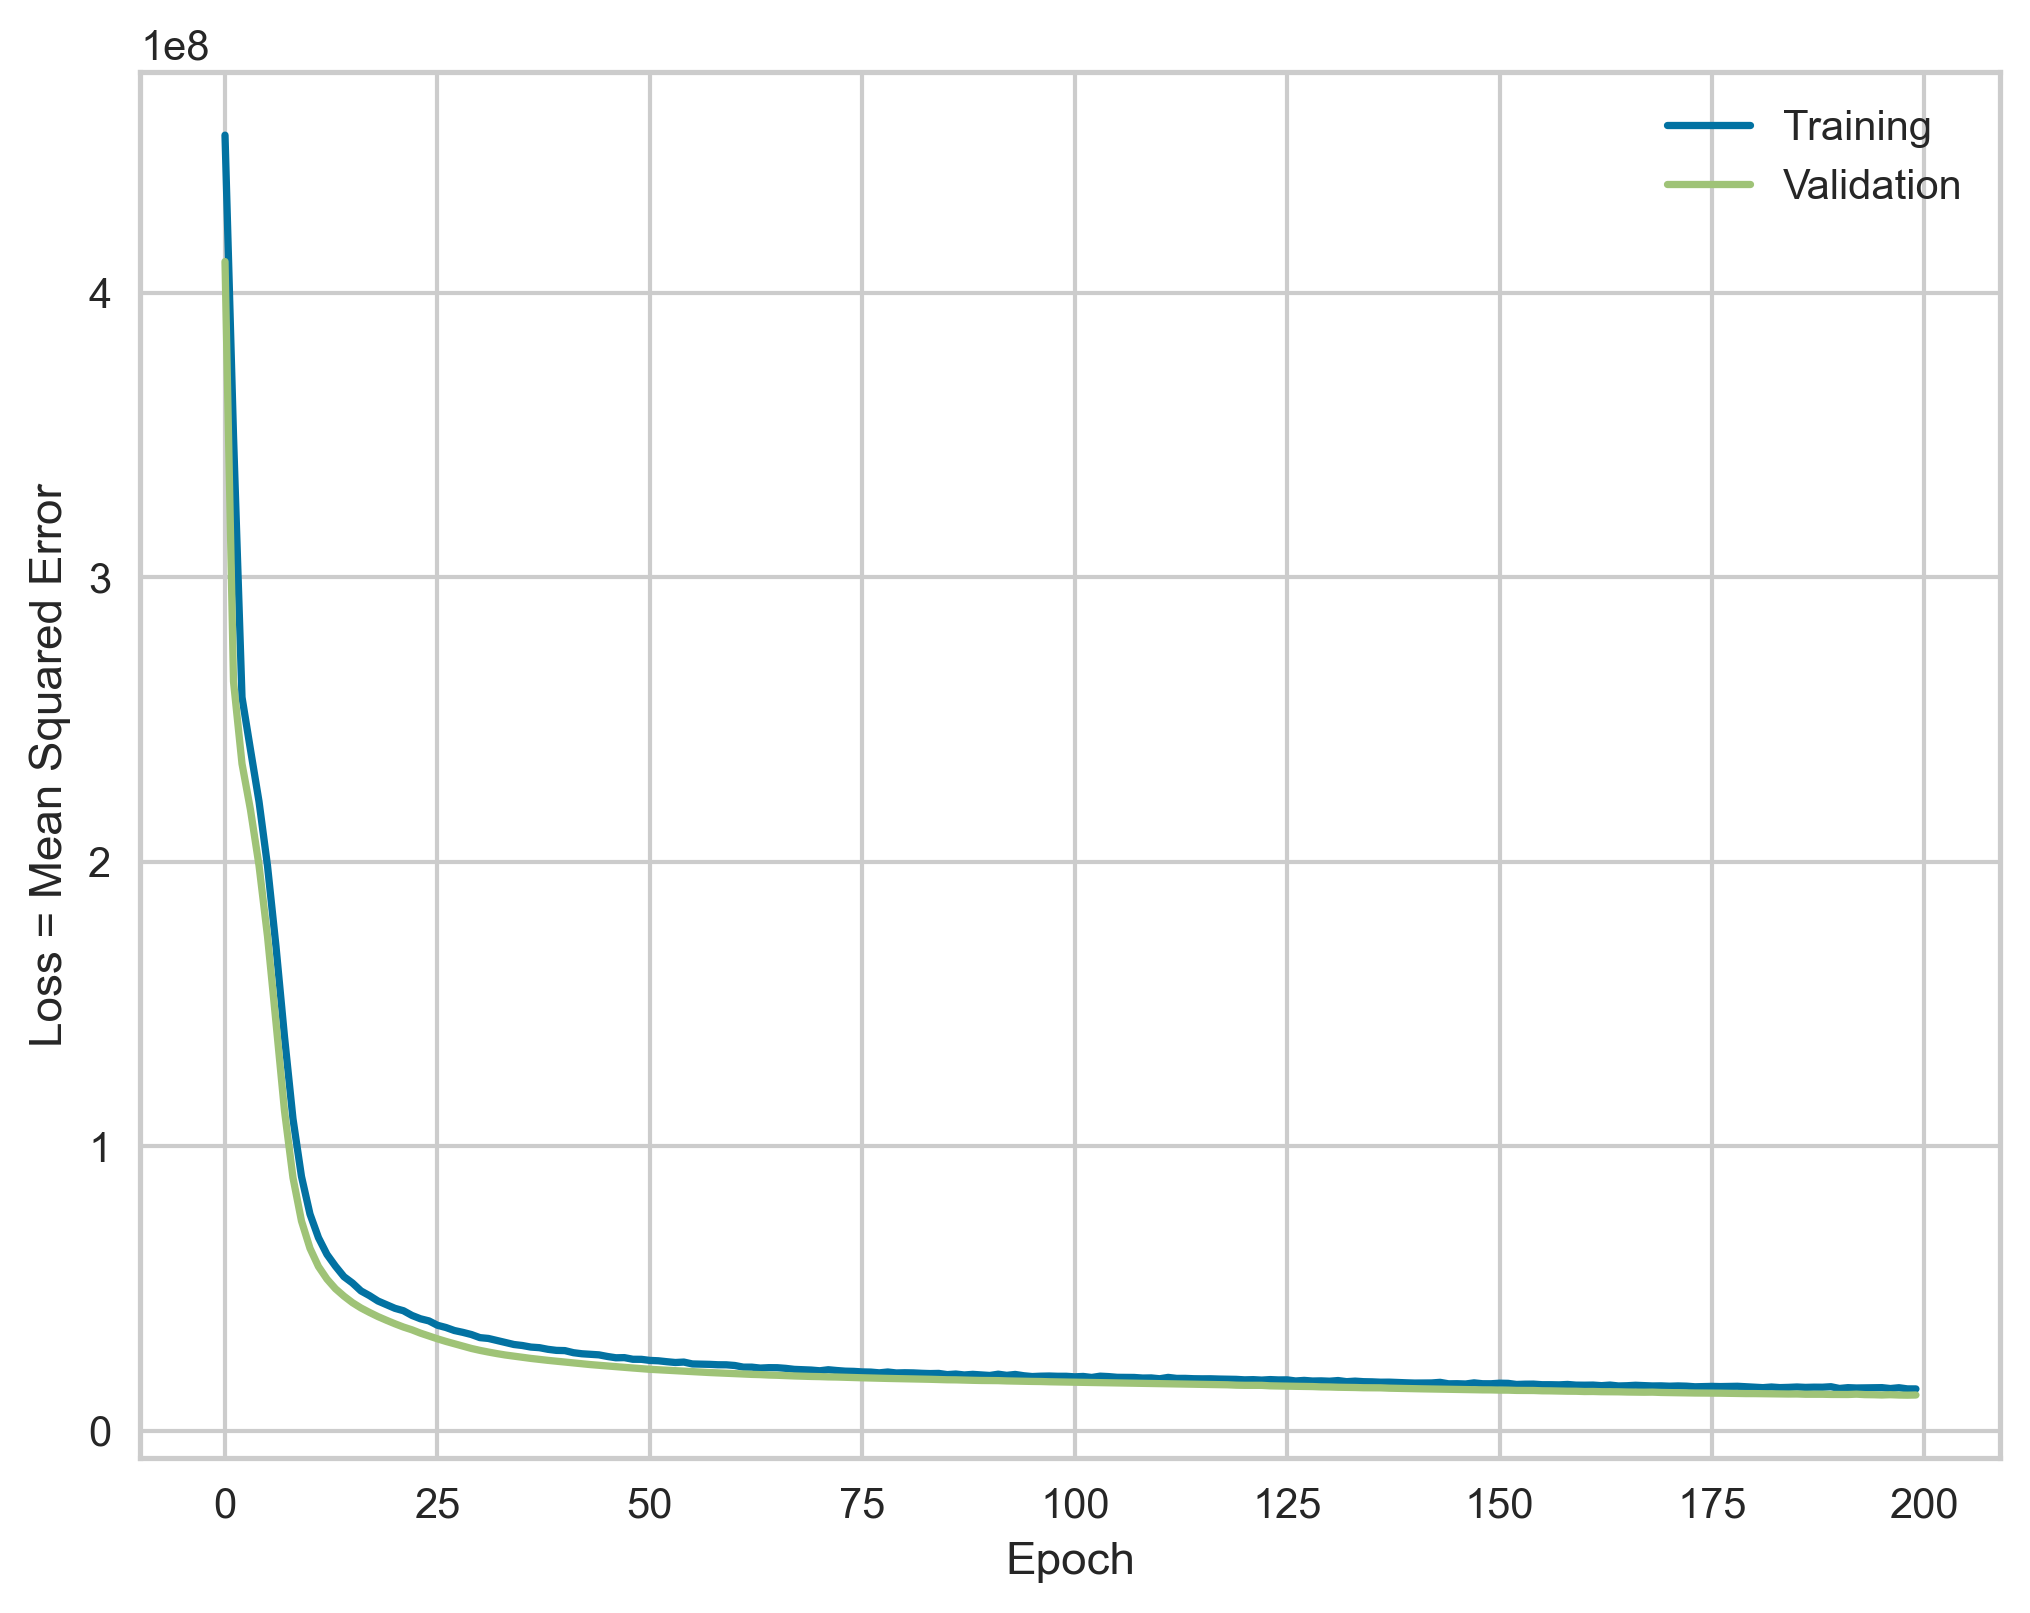

In [93]:
# the history of the fitting.
history_df = pd.DataFrame(history.history)

# Next, use matplotlib to create a figure.
plt.figure(figsize = (8, 6), dpi = 300)
# Plot the history of the training and
# validation losses.
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
# Show the plot.
plt.show() 

In [94]:
# Evaluation Matrics
evaluation_matrics(y_test, y_pred)

Mean absolute error:  1743.5078424804688
Mean squared error:  13356575.149791861
Root mean squared error:  3654.6648478064117
R2_score:  0.9507818902759715


f. Use the k-Means clustering algorithm to identify clusters in the car sales data. 
Consider different combinations of the numerical variables in the dataset to use as 
input features for the clustering algorithm. In each case, what is the optimal number 
of clusters (k) to use and why? Which combination of variables produces the best 
clustering results? Use appropriate evaluation metrics to support your conclusions.

In [95]:
# Extract the input features
feature_names = ["Engine size", "Price"]
x = car_sales[feature_names]


# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x. This will find the mean and standard
# deviation of each column in x.
scale.fit(x)
# Now we can apply the standard scaler transformation
# to re-scale each column in x.
x_scaled = scale.transform(x)


# Import the k-Means model
from sklearn.cluster import KMeans
# Create a list to record the inertia
# for each value of k.
inertia = []
# Define the range of values of k
# that we will use.
k_range = range(1, 11)
# Loop through the possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 42)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

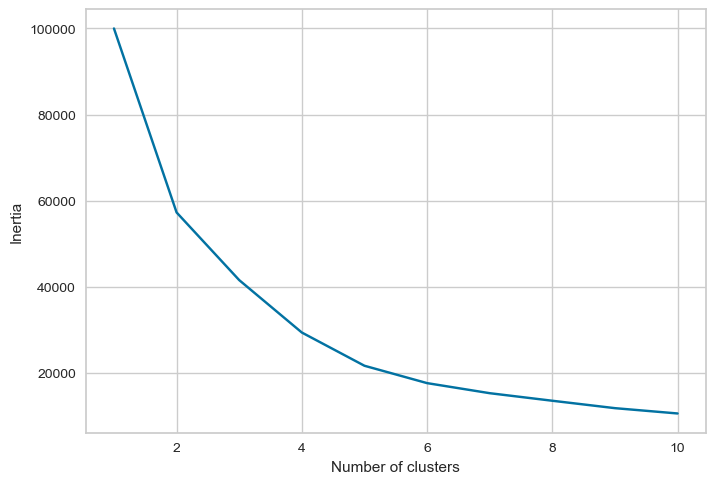

In [96]:
# Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label the axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the figure
plt.show()

Davies Bouldin Index: 0.7655
Silhouette Coefficient: 0.4922


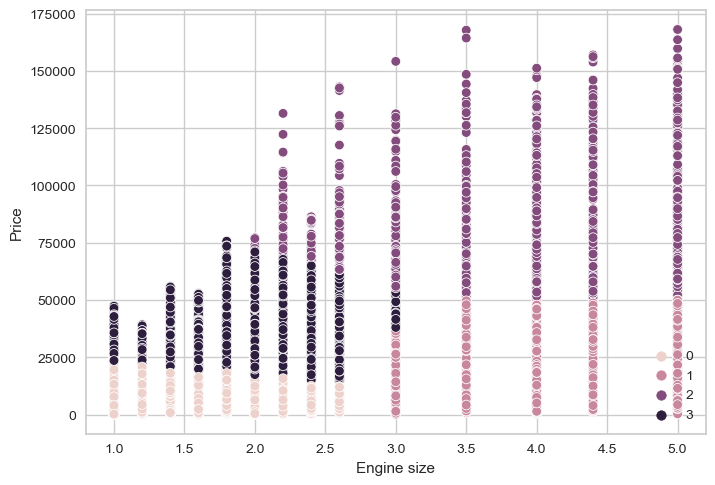

In [97]:
# Fit the final k-Means model
# with our chosen k=4
kmeans_final = KMeans(n_clusters = 4, random_state = 42)

kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)


# Import the internal measures
from sklearn.metrics import davies_bouldin_score, silhouette_score
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

 # Visualise the clusters in a scatter plot
sns.scatterplot(data = car_sales, x = "Engine size", y = "Price", hue = cluster_labels_pred)
# Add a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("Engine size")
plt.ylabel("Price")
# Show the figure
plt.show()

#### k-Means Clustering - Price versus Year of manufacture

In [100]:
 # Extract the input features
feature_names = ["Year of manufacture", "Price"]
x = car_sales[feature_names]
# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

In [101]:
# Create a list to record the inertia
inertia = []
# Define the range of values of k
# that we will use.
k_range = range(1, 11)
# Loop through possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 42)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

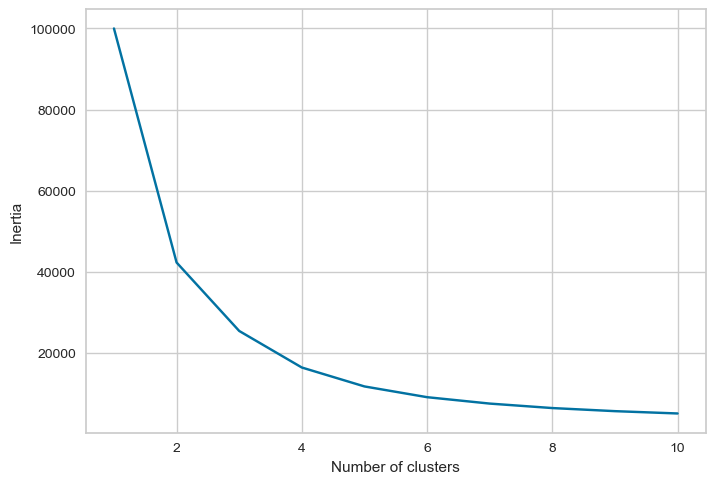

In [102]:
# Plot inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label both axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the plot
plt.show()

In [103]:
 # Fit the final k-Means model
# with our chosen k=3
kmeans_final = KMeans(n_clusters = 3, random_state = 42)
kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

In [104]:
 # Apply the evaluation metrics.
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)


# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.6865
Silhouette Coefficient: 0.5140


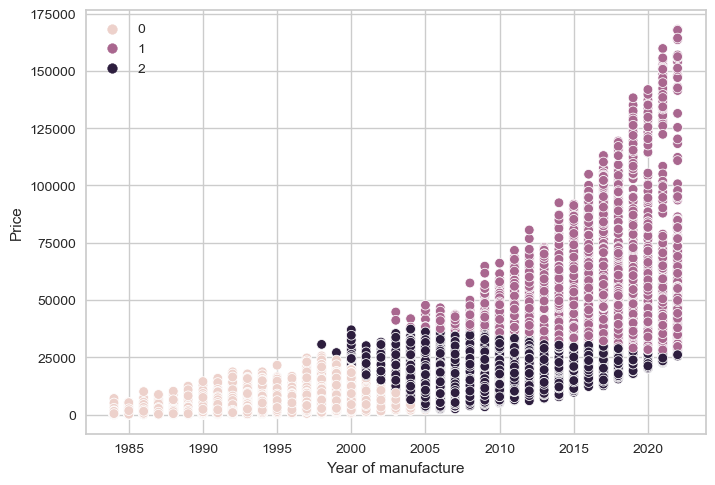

In [105]:
# Visualise the clusters
sns.scatterplot(data = car_sales, x = "Year of manufacture", y = "Price",hue = cluster_labels_pred)
# Label both axes

plt.xlabel("Year of manufacture")
plt.ylabel("Price")

plt.show()

OPTICS Silhouette Score: 0.2743
OPTICS Davies Bouldin Index: 1.5355


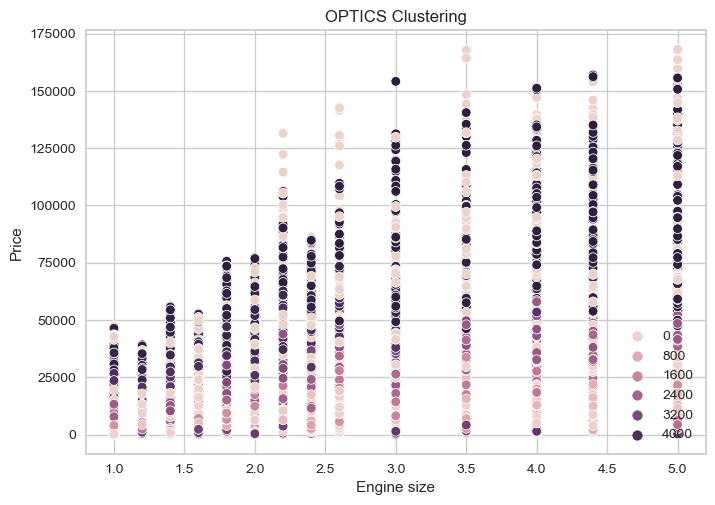

In [106]:
from sklearn.cluster import OPTICS


# Standardize the data
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

# OPTICS
optics = OPTICS()
cluster_labels_optics = optics.fit_predict(x_scaled)

# Evaluate OPTICS results
silhouette_optics = silhouette_score(x_scaled, cluster_labels_optics)
db_score_optics = davies_bouldin_score(x_scaled, cluster_labels_optics)

print("OPTICS Silhouette Score: {:.4f}".format(silhouette_optics))
print("OPTICS Davies Bouldin Index: {:.4f}".format(db_score_optics))

# Visualize OPTICS clusters
sns.scatterplot(data=car_sales, x="Engine size", y="Price", hue=cluster_labels_optics)
plt.title("OPTICS Clustering")
plt.xlabel("Engine size")
plt.ylabel("Price")
plt.legend(loc="lower right")
plt.show()
